In [12]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fbprophet
import sklearn
import cpi

import prepare
import explore
pd.plotting.register_matplotlib_converters()


### Acquire 

In [2]:
df = prepare.get_data()

### Prep

In [8]:
df2 = prepare.get_prepped()

### Exploration

Top Coffee Producing Regions of Colombia


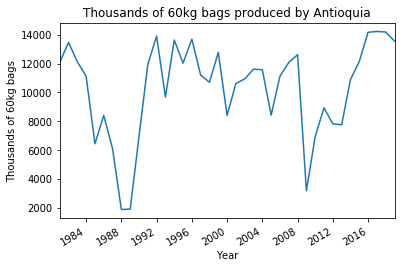

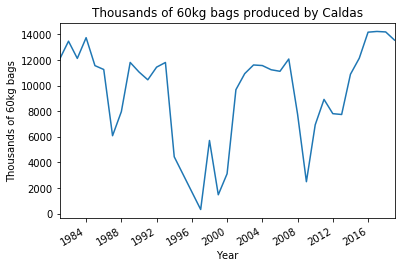

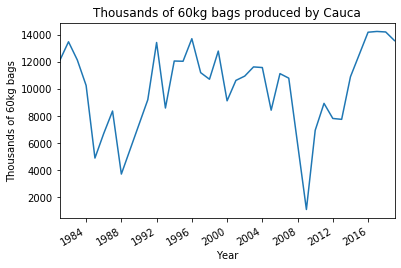

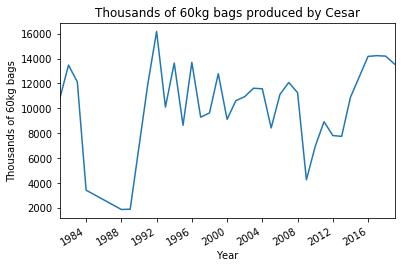

TypeError: float() argument must be a string or a number, not 'Period'

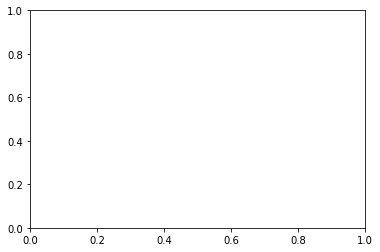

In [3]:
# Production by region 1980-2018
explore.production_by_region(df)

In [6]:
df.drop('1971-')

(14,)

### Model